In [1]:
%matplotlib inline


# Plot learning curves of different classifiers

This example is a small modification of the sciki-learn tutorial test.
Comparison of different linear SVM classifiers on a 2D projection of the iris
dataset. Here I consider only two features of the dataset:

- Seed area
- Seed asymmetry

Test linear and other models, and use multiple features of the seeds dataset.


In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt






Automatically created module for IPython interactive environment


In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd

#I use this dataset because this has clearly separated cathegories, 
#Read the database using pandas, 
#Note that bad lines are omitted with error_bad_lines=False
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/00236/seeds_dataset.txt', header=None, sep="\t", error_bad_lines=False)

#The headers are not given in the dataset, so we give them afterwords:
#1. area A, 
#2. perimeter P, 
#3. compactness C = 4*pi*A/P^2, 
#4. length of kernel, 
#5. width of kernel, 
#6. asymmetry coefficient 
#7. length of kernel groove. 
#8. Class: 1=Kama, 2=Rosa, 3=Canadian

df.columns = ["area","perimeter","compactness","kernel-length","kernel-width",
              "asymmetry","kernel-groove-length","class"]

#This shows the header of the database:
df.head()



Automatically created module for IPython interactive environment


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,area,perimeter,compactness,kernel-length,kernel-width,asymmetry,kernel-groove-length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


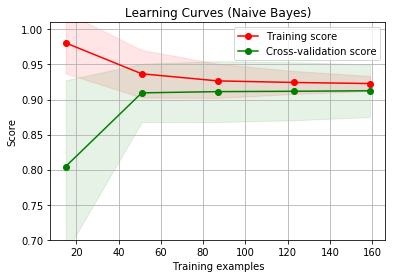

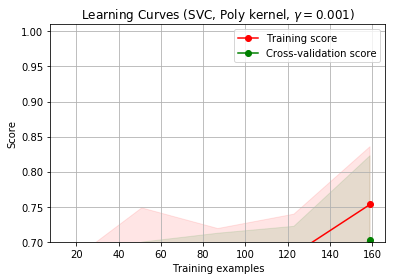

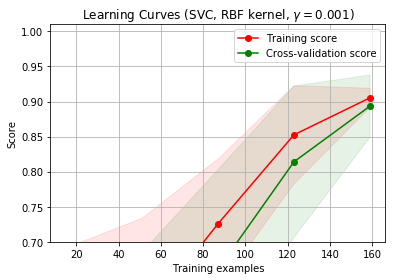

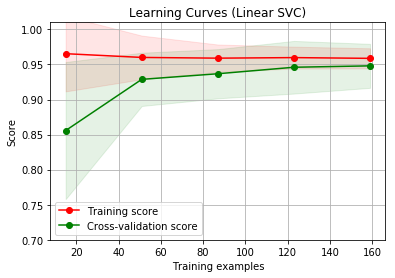

In [4]:

#In the database there are 3 classes of seeds:
#And skilearn can handle multiple classes


import numpy as np

#This sets class=2 to 0 and 3 to 1:
y = df.loc[:,'class']

#Extract all cathegories:
X=df.iloc[:,0:7]
#This is to convert the csv dictionary into a numpy matrix to later standarize:
X=X.as_matrix()

nfeature=X.shape[1]

# standardize features
X_std = np.copy(X)
for ifeat in range(0,nfeature):
    X_std[:,ifeat] = (X[:,ifeat] - X[:,ifeat].mean()) / X[:,ifeat].std()


#Here since we have many features, we just plot the learning curves for the training and cross-validation sets.


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVC, Poly kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVC(kernel='poly',gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVC, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVC(kernel='rbf',gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Linear SVC)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = svm.LinearSVC(C=1.0)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()
